In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [86]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [87]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
df.shape

(500, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [90]:
df.duplicated().sum()

0

In [91]:
df.drop(columns=['Serial No.'],inplace=True)

In [92]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [93]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,)


In [95]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
272,294,95,1,1.5,1.5,7.64,0
152,321,112,5,5.0,5.0,9.06,1
338,323,108,5,4.0,4.0,8.74,1
334,312,107,4,4.5,4.0,8.65,1
112,301,107,3,3.5,3.5,8.34,1
...,...,...,...,...,...,...,...
284,340,112,4,5.0,4.5,9.66,1
49,327,111,4,3.0,4.0,8.40,1
374,315,105,2,2.0,2.5,7.65,0
474,308,105,4,3.0,2.5,7.95,1


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [97]:

import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Flatten

In [98]:
model=Sequential()


model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='linear'))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [101]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3775 - val_loss: 0.3357
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2980 - val_loss: 0.2554
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2234 - val_loss: 0.1827
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1564 - val_loss: 0.1199
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1000 - val_loss: 0.0705
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0578 - val_loss: 0.0367
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0307 - val_loss: 0.0186
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0124
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0118
Epoch 11

In [102]:
y_pred=model.predict(x_test_scaled)

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6849709089625626

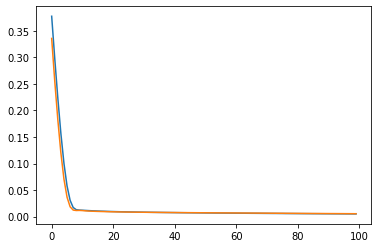

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])